In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown --id 1CWCo7GFk3lZky1EXjZ6XpHZS5tUbBOj1

Downloading...
From: https://drive.google.com/uc?id=1CWCo7GFk3lZky1EXjZ6XpHZS5tUbBOj1
To: /content/Features_no_filtering_ordered.csv
100% 83.2M/83.2M [00:01<00:00, 75.4MB/s]


In [ ]:
data = pd.read_csv('/content/Features_no_filtering_ordered.csv')
data.iloc[:,200:]
to_delete = np.array(data.columns[156:204])
data.drop(columns=to_delete, inplace=True)

In [ ]:
X_test = data.loc[(data['film'] == 41)].reset_index(drop=True)
X_train = data.loc[(data['film'] != 41)].reset_index(drop=True)

X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

y_train = X_train['labels']
y_test = X_test['labels']

train_film = X_train['film']
train_subj = X_train['Subj']
train_ch = X_train['ch']
test_film = X_test['film']
test_subj = X_test['Subj']
test_ch = X_test['ch']
X_train = X_train.drop(['labels', 'ch', 'Subj', 'film'], axis=1)
X_test = X_test.drop(['labels', 'ch', 'Subj', 'film'], axis=1)

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt_train = QuantileTransformer(output_distribution='normal', copy=True)
y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
qt_test = QuantileTransformer(output_distribution='normal', copy=True)
y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test).reshape(-1, 1)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (126). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb30a33b50>]],
      dtype=object)

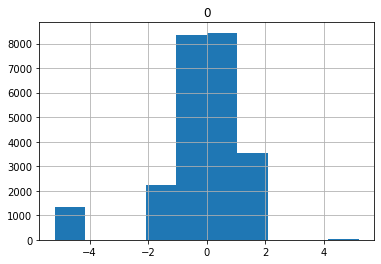

In [ ]:
y_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb3093ef50>]],
      dtype=object)

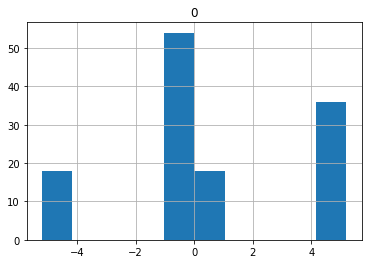

In [ ]:
y_test.hist()

In [ ]:
from sklearn import linear_model

model = linear_model.LassoCV()
model.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_weights(features, weights, scales, a = 0, b = 0):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()
    return features[a:b], weights[a:b]

In [ ]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=model, max_features=50, prefit=True)
X_selected_train = selector.transform(X_train)
X_selected_test = selector.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
data_selected = data
data_selected = data_selected.drop(['labels', 'ch', 'Subj', 'film'], axis=1)
for i in range(data_selected.shape[1]):
  if not selector.get_support()[i]:
    data_selected.drop(data.columns[i], axis=1, inplace=True)

In [ ]:
print("Best alpha using built-in LassoCV: %f" % model.alpha_)
print("Best score using built-in LassoCV: %f" % model.score(X_train, y_train))
coef = pd.Series(model.coef_, index = X_train.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 50.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

([], [])

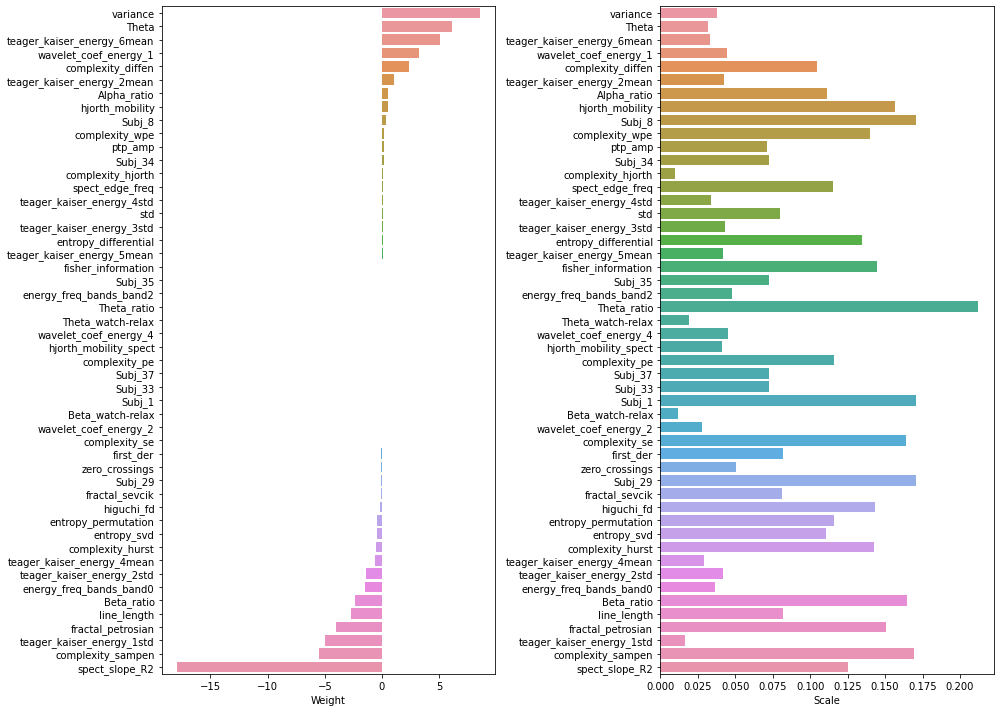

In [ ]:
show_weights(data_selected.columns, model.coef_, X_train[data_selected.columns].std())

In [ ]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn import linear_model


In [ ]:
data_all = pd.read_csv('/content/Features_no_filtering_ordered.csv')

In [ ]:
models = ['Lasso']
metrics = ['MAPE', 'MAE', 'R2']
formes = ['inverted', 'average']
columns = [
    np.array([models[i] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([metrics[j] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([formes[k] for i in range(1) for j in range(3) for k in range(2)]),
]
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']


In [ ]:
result = pd.DataFrame()
grid_res = []
n_films = 40
n_subjects = 32
for film in tqdm_notebook(range(1, n_films + 1)):
    df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test_inv = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    
    X_train = X_train.drop(['film', 'Subj', 'labels'], axis=1)
    X_test = X_test.drop(['film', 'Subj', 'labels'], axis=1)
    
    qt_train = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
    qt_test = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))
    
    model = linear_model.LassoCV()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('Lasso', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('Lasso', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('Lasso', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    
    pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
    num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
    labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
    lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
    channels = [[] for i in range(n_subjects)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += preds[i]
        num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
        labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += y_test_inv[i]
        channels[np.array(test_subj)[i] - 1].append(chans[test_ch[i] - 1])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(n_films):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])

    df[('Lasso', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('Lasso', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('Lasso', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    result = pd.concat([result, df], axis=0)


In [ ]:
result.describe()

Lasso                                                       
            MAPE                   MAE                    R2           
        inverted    average   inverted    average   inverted    average
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000
mean    0.285861   0.444934   1.384810   1.376837  -5.907769  -0.001769
std     0.140274   0.192808   0.276348   0.277049   3.301022   0.154841
min     0.111503   0.146128   0.826885   0.820012 -14.615252  -0.416871
25%     0.189800   0.323940   1.186696   1.184244  -8.056448  -0.107685
50%     0.242500   0.412301   1.354783   1.343659  -5.635819   0.007069
75%     0.330265   0.567125   1.568241   1.550327  -3.181032   0.087096
max     0.706724   1.031397   2.034862   2.034306  -0.901459   0.414340

In [ ]:
!pip install shap

In [ ]:
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
result = pd.DataFrame()
grid_res = []
n_films = 8
import shap

for film in tqdm_notebook(range(1, n_films + 1)):
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    
    X_train = X_train.drop(['film', 'Subj', 'labels', 'ch'], axis=1)
    X_test = X_test.drop(['film', 'Subj', 'labels', 'ch'], axis=1)
    
    
    model = linear_model.LassoCV()
    model.fit(X_train, y_train)
    X_train_summary = shap.kmeans(X_train, 10)
    explainer = shap.KernelExplainer(model.predict, X_train_summary)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, max_display=23, show=False)
    plt.savefig('F{}_deap.png'.format(film),  bbox_inches='tight')
    plt.clf()